In [1]:
#loading the dataset
#importing pandas library


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [88]:
#Reading the dataset

In [89]:
dataset =pd.read_csv('C:/Users/Stephen/Downloads/Insurance.csv')

In [90]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [91]:
#Getting the Shape

In [92]:
dataset.shape

(1338, 7)

In [93]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [96]:
dataset.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [97]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Checking values of the target variable(smoker)

In [98]:
dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\Stephen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


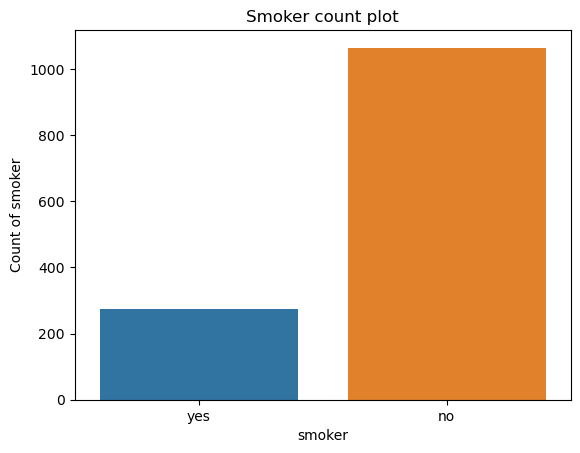

In [101]:
sns.countplot(dataset["smoker"])
plt.xlabel("smoker")
plt.ylabel("Count of smoker")
plt.title("Smoker count plot")
plt.show()

In [102]:
x=dataset.iloc[:, :-1]
y=dataset.iloc[:, -1]

In [103]:
x.shape

(1338, 6)

In [104]:
y.shape

(1338,)

In [ ]:
#TSplitting and Training and Testing Sets

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    random_state=99)

In [13]:
print(X[:10])

    Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0  Hargrave          619    France  Female   42       2       0.00   
1      Hill          608     Spain  Female   41       1   83807.86   
2      Onio          502    France  Female   42       8  159660.80   
3      Boni          699    France  Female   39       1       0.00   
4  Mitchell          850     Spain  Female   43       2  125510.82   
5       Chu          645     Spain    Male   44       8  113755.78   
6  Bartlett          822    France    Male   50       7       0.00   
7    Obinna          376   Germany  Female   29       4  115046.74   
8        He          501    France    Male   44       4  142051.07   
9        H?          684    France    Male   27       2  134603.88   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3

In [ ]:
#creating a RandomForestRegressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=8,
                           min_samples_split = 10,
                           random_state = 5)

In [ ]:
#Converting data into arrays using One-Hot Encoder

In [148]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["sex","smoker","region"]
one_hot= OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                  one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
                                  
transformed_x = transformer.fit_transform(x)
transformed_x


array([[ 1.  ,  0.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 33.77,  1.  ],
       [ 0.  ,  1.  ,  1.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 61.  , 29.07,  0.  ]])

In [149]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0


In [150]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=10, random_state=5)

In [129]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=10, random_state=5)

In [130]:
rf.feature_importances_

array([0.00114042, 0.00102315, 0.44135006, 0.21686002, 0.00358736,
       0.00188074, 0.00143815, 0.00138843, 0.12663868, 0.19196344,
       0.01272954])

In [133]:
y_pred=rf.predict(x_test)

In [134]:
y_pred

array([10463.8332056 ,  5413.02993708, 27554.38365189, 10678.20910272,
       34697.39104976,  7317.38743133,  1968.18211002, 14426.72750161,
        7609.64054416, 11594.10706058, 19948.43381736,  7255.25771148,
        5050.44400455, 45116.80346914, 47757.61476738, 44644.06577018,
       10758.98488295, 43223.70707324,  9971.39585163, 24891.59284642,
        5581.23820771,  9895.01588612,  2439.68011709,  3467.13070197,
       12076.51172496, 12253.71055988, 13890.88418473,  5968.12228298,
       11642.50969093,  4144.42879505,  7483.5419198 , 12318.11314583,
        3407.89585439,  6456.50117151,  3985.61294199, 10774.4539052 ,
        3145.30505981,  8928.2158738 , 23967.09519524, 40066.19481084,
        5793.86452882,  4217.4451959 , 12549.21314404, 14679.16580725,
        6398.6696412 , 15548.68646707, 11536.142561  ,  5818.26547367,
       42320.0529537 ,  6020.45683802, 14605.17154869,  3254.82538676,
        6980.76810878,  1983.81771418, 12345.74953541, 10901.75002288,
      

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=int64)

In [158]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, x_train,  y_train, cv=10)

array([0.85065248, 0.82292937, 0.92477955, 0.89969446, 0.84698474,
       0.78277526, 0.7774995 , 0.80277183, 0.84137282, 0.86091345])

In [160]:
from sklearn.metrics import classification_report
classification_report(y_true, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           1       0.00      0.00      0.00         1\n           2       0.00      0.00      0.00         1\n           3       1.00      1.00      1.00         1\n\n    accuracy                           0.50         4\n   macro avg       0.50      0.50      0.50         4\nweighted avg       0.50      0.50      0.50         4\n'

In [ ]:
#Visualization

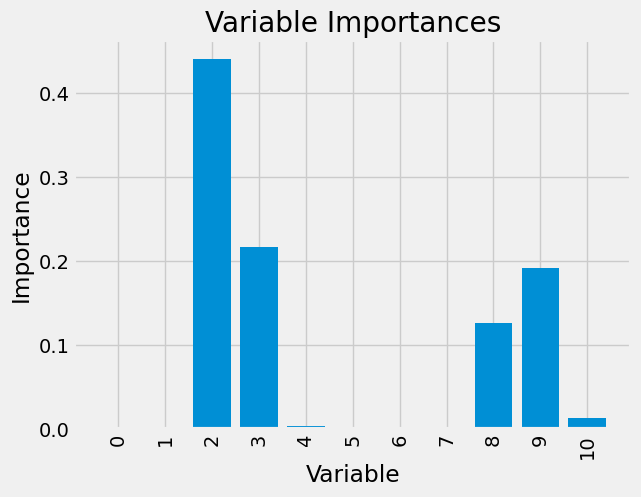

In [188]:

import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');